In [1]:
import numpy as np
from scipy import sparse
import pylab as plt
from sklearn import datasets

In [2]:
def Frank_Wolfe_Liphiz(A,b,tol = 1e-6, max_iter = 200):
    x_k = sparse.dok_matrix((n_features, 1)) # x_0
    Atb = A.T.dot(b)
    alpha_max = A.shape[0] / 4
    hist = []
    for it in range(max_iter):
        Ax = x_k.T.dot(A.T).ravel() 
        grad = (A.T.dot(Ax) - Atb)


        max_idx = np.argmax(np.abs(grad))
        mag_oracle = alpha_max * np.sign(-grad[max_idx])
        d_k = -x_k.copy()
        d_k[max_idx] += mag_oracle
        g_k = - d_k.T.dot(grad).ravel()
        if g_k <= tol:
            break
        q_k = A[:, max_idx] * mag_oracle - Ax
        step_size = min(q_k.dot(b - Ax) / q_k.dot(q_k), 1.)
        x_k += step_size * d_k

        hist.append(g_k)
    
    return hist, x_k

In [3]:
def Frank_Wolfe_Default(A,b,tol = 1e-6, max_iter = 200):
    x_k = sparse.dok_matrix((n_features, 1)) # x_0
    Atb = A.T.dot(b)
    alpha_max = A.shape[0] / 4
    hist = []
    for it in range(max_iter):
        Ax = x_k.T.dot(A.T).ravel() 
        grad = (A.T.dot(Ax) - Atb)


        max_idx = np.argmax(np.abs(grad))
        mag_oracle = alpha_max * np.sign(-grad[max_idx])
        d_k = -x_k.copy()
        d_k[max_idx] += mag_oracle
        g_k = - d_k.T.dot(grad).ravel()
        if g_k <= tol:
            break

        step_size = 2 / (2 + it)
        x_k += step_size * d_k

        hist.append(g_k)
    
    return hist, x_k

In [4]:
n_samples, n_features = 10000, 10000
A, b = datasets.make_regression(n_samples, n_features)

hist_default, _ = Frank_Wolfe_Default(A, b)
hist_liphiz, _ = Frank_Wolfe_Liphiz(A, b)

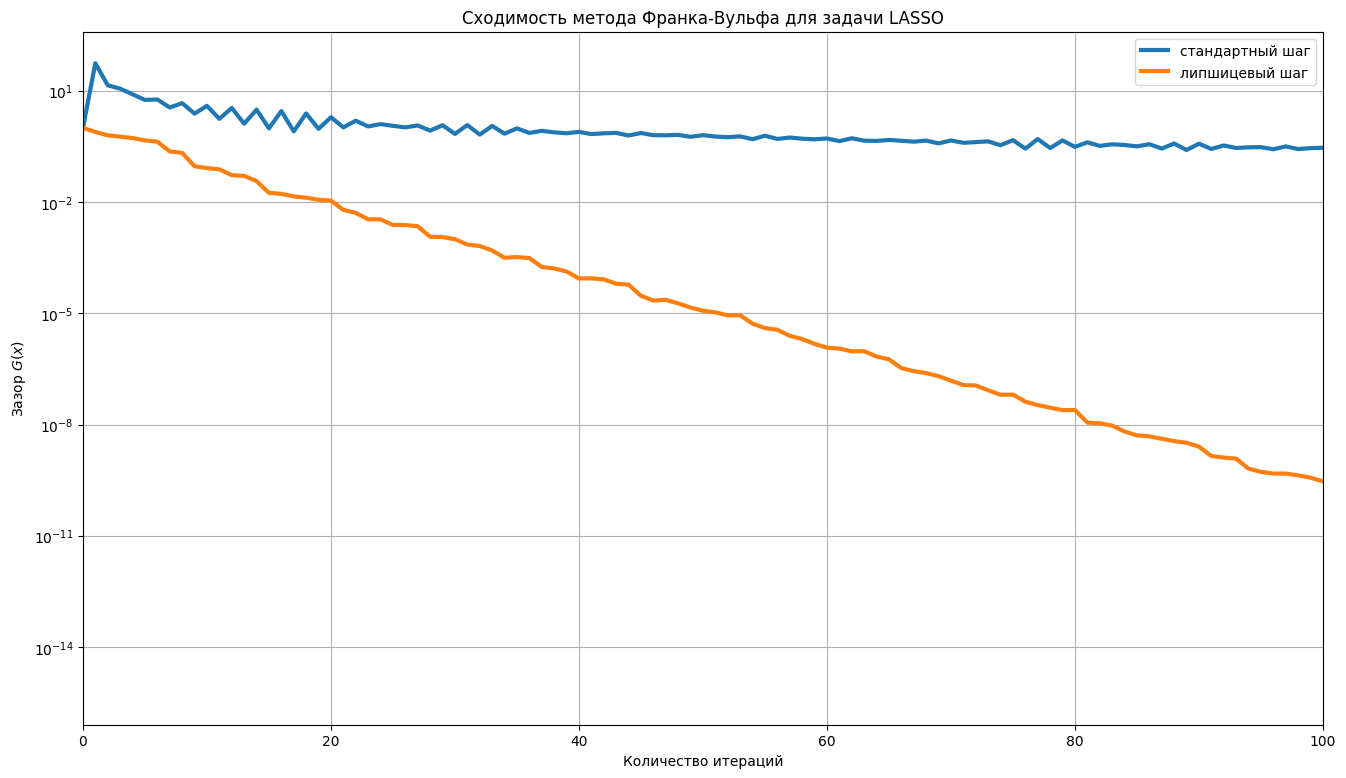

In [5]:
plt.figure(figsize = (16, 9))
plt.plot(hist_default / hist_default[0], lw=3, label = 'стандартный шаг')
plt.plot(hist_liphiz / hist_liphiz[0], lw=3, label = 'липшицевый шаг')
plt.yscale('log')
plt.xlabel('Количество итераций')
plt.ylabel(fr'Зазор $G(x)$')
plt.title('Сходимость метода Франка-Вульфа для задачи LASSO')
plt.xlim((0, 100))
plt.grid()
plt.legend()
plt.show()